# Redes dinâmicas em R

-  Representação, manipulação e visualização

-  Caracterização de redes dinâmicas

-  Modelagem de redes dinâmicas


por **Cibele Russo**

Baseado em 

- Eric D. Kolaczyk, Gábor Csárdi (2014). Statistical Analysis of Network Data with R, Springer.





Exemplo: manchas solares

A superfície do sol contém regiões magnéticas que aparecem como manchas escuras. Elas afetam a propagação das ondas de rádio e, por isso, as empresas de telecomunicações gostam de prever a atividade das manchas solares para fazer planos para quaisquer dificuldades futuras. As manchas solares seguem um ciclo de duração entre 9 e 14 anos. Apresentamos abaixo as previsões de um NNAR (10,6) são mostradas para os próximos 30 anos. Uma transformação Box-Cox com lambda = 0 é definida para garantir que as previsões permaneçam positivas.


Fonte: https://otexts.com/fpp2/nnetar.html

In [1]:
# install.packages('forecast', 'fpp')

library(forecast)
library(fpp)

fit <- nnetar(sunspotarea, lambda=0)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: tseries



In [2]:
?nnetar

In [3]:
summary(fit)

          Length Class        Mode     
x         137    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
size        1    -none-       numeric  
lambda      1    -none-       numeric  
subset    137    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    137    ts           numeric  
residuals 137    ts           numeric  
lags       10    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        3    -none-       call     

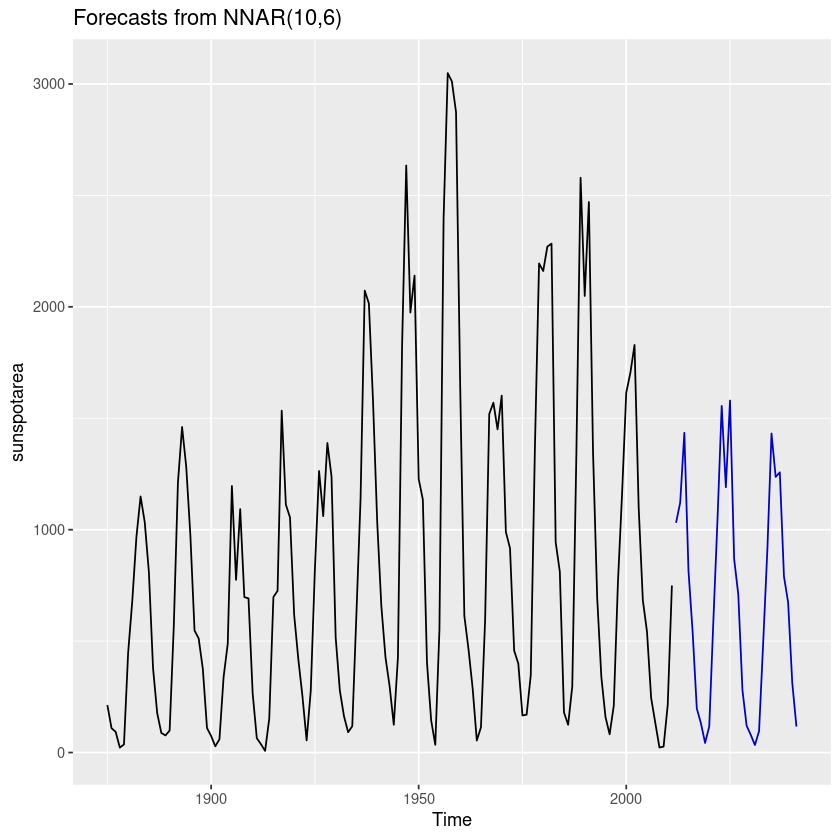

In [4]:
autoplot(forecast(fit,h=30))

For a multivariate timeseries, specify a seriesname for each timeseries. Defaulting to column names.



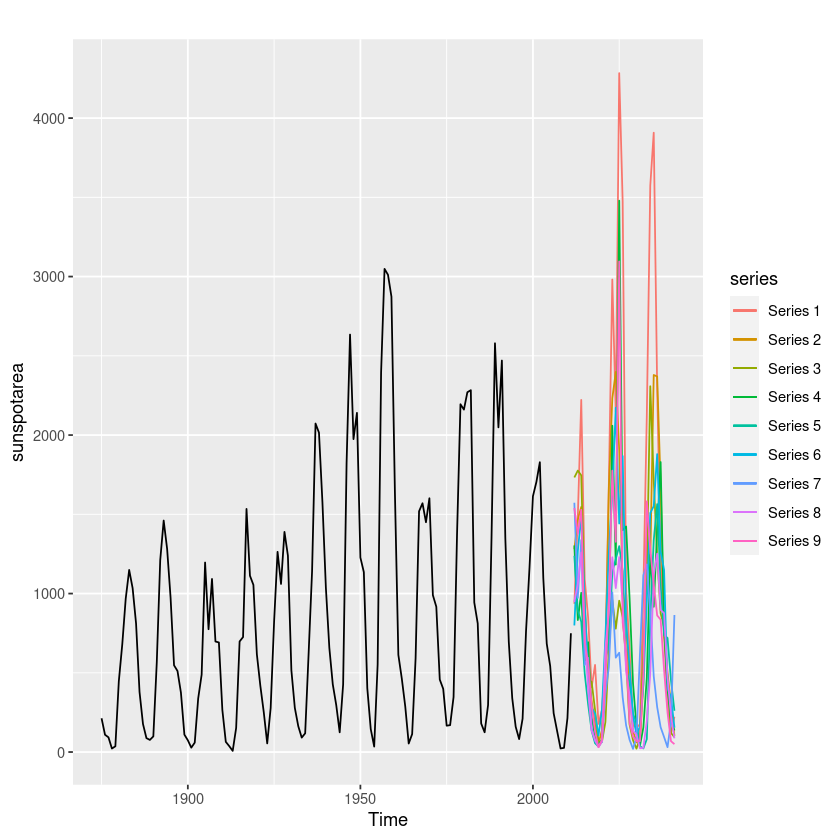

In [5]:
sim <- ts(matrix(0, nrow=30L, ncol=9L),
  start=end(sunspotarea)[1L]+1L)

for(i in seq(9))
  sim[,i] <- simulate(fit, nsim=30L)

autoplot(sunspotarea) + autolayer(sim)

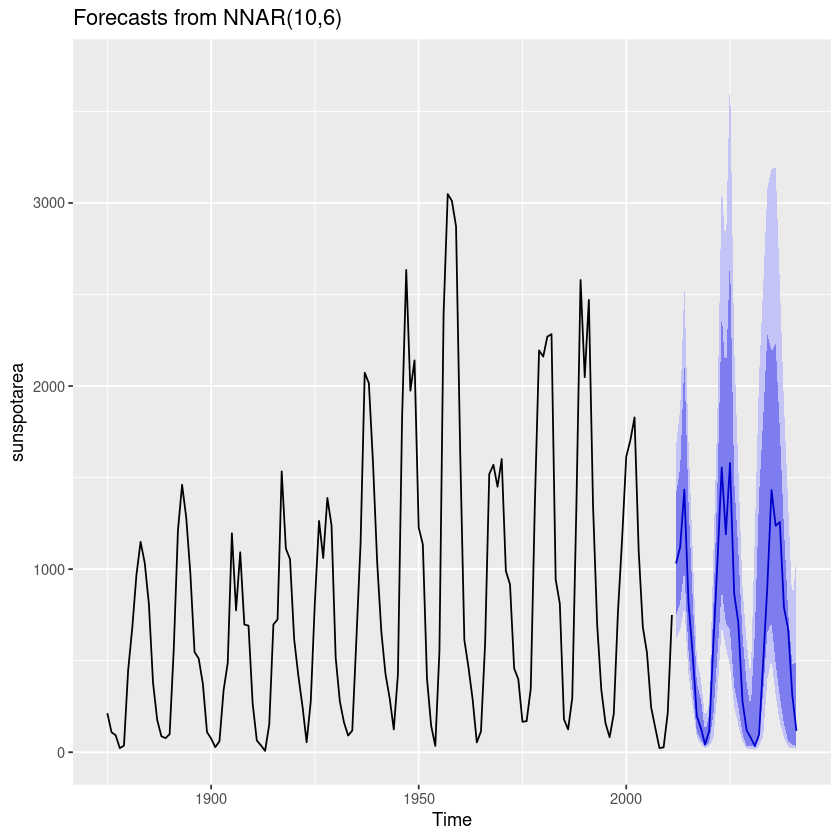

In [6]:
fcast <- forecast(fit, PI=TRUE, h=30)
autoplot(fcast)

In [7]:
fcast

     Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
2012     1030.97075 744.60184 1408.9893 618.87853 1670.5301
2013     1121.32776 816.90711 1552.2459 670.59184 1875.0624
2014     1434.50631 996.46498 2130.9040 797.36245 2549.1929
2015      814.80203 553.39676 1367.6605 427.39538 1696.4961
2016      540.18180 332.40078  846.3106 251.79468 1104.3665
2017      197.77586 112.84695  377.4210  84.13861  510.7933
2018      130.83014  67.69345  286.0955  43.73014  397.7186
2019       43.11286  30.13920  110.6171  22.68712  184.3578
2020      117.14929  56.64922  208.2963  34.94851  268.4911
2021      595.45864 207.81634  798.9472  76.40624 1081.9195
2022     1051.55072 543.30637 1478.2626 334.76682 1882.7731
2023     1555.27500 893.22018 2392.0286 688.29013 3097.0644
2024     1190.54317 706.26833 2047.4843 573.26939 2728.3236
2025     1579.45745 667.81709 2708.2176 472.40183 3708.9258
2026      868.51666 361.72339 1484.2803 249.39195 2221.5258
2027      707.69965 246.47047 1099.3256 